In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split   #train _test split


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado[1].csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
# rename the some columns
df.rename(columns={'4046':'Small(4046)','4225':'Large(4225)','4770':'Extra_Large(4770)'},inplace=True)
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:

df.shape

(18249, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               18249 non-null  datetime64[ns]
 1   AveragePrice       18249 non-null  float64       
 2   Total Volume       18249 non-null  float64       
 3   Small(4046)        18249 non-null  float64       
 4   Large(4225)        18249 non-null  float64       
 5   Extra_Large(4770)  18249 non-null  float64       
 6   Total Bags         18249 non-null  float64       
 7   Small Bags         18249 non-null  float64       
 8   Large Bags         18249 non-null  float64       
 9   XLarge Bags        18249 non-null  float64       
 10  type               18249 non-null  object        
 11  year               18249 non-null  int64         
 12  region             18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory 

In [9]:

df.isnull().sum()

Date                 0
AveragePrice         0
Total Volume         0
Small(4046)          0
Large(4225)          0
Extra_Large(4770)    0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
type                 0
year                 0
region               0
dtype: int64

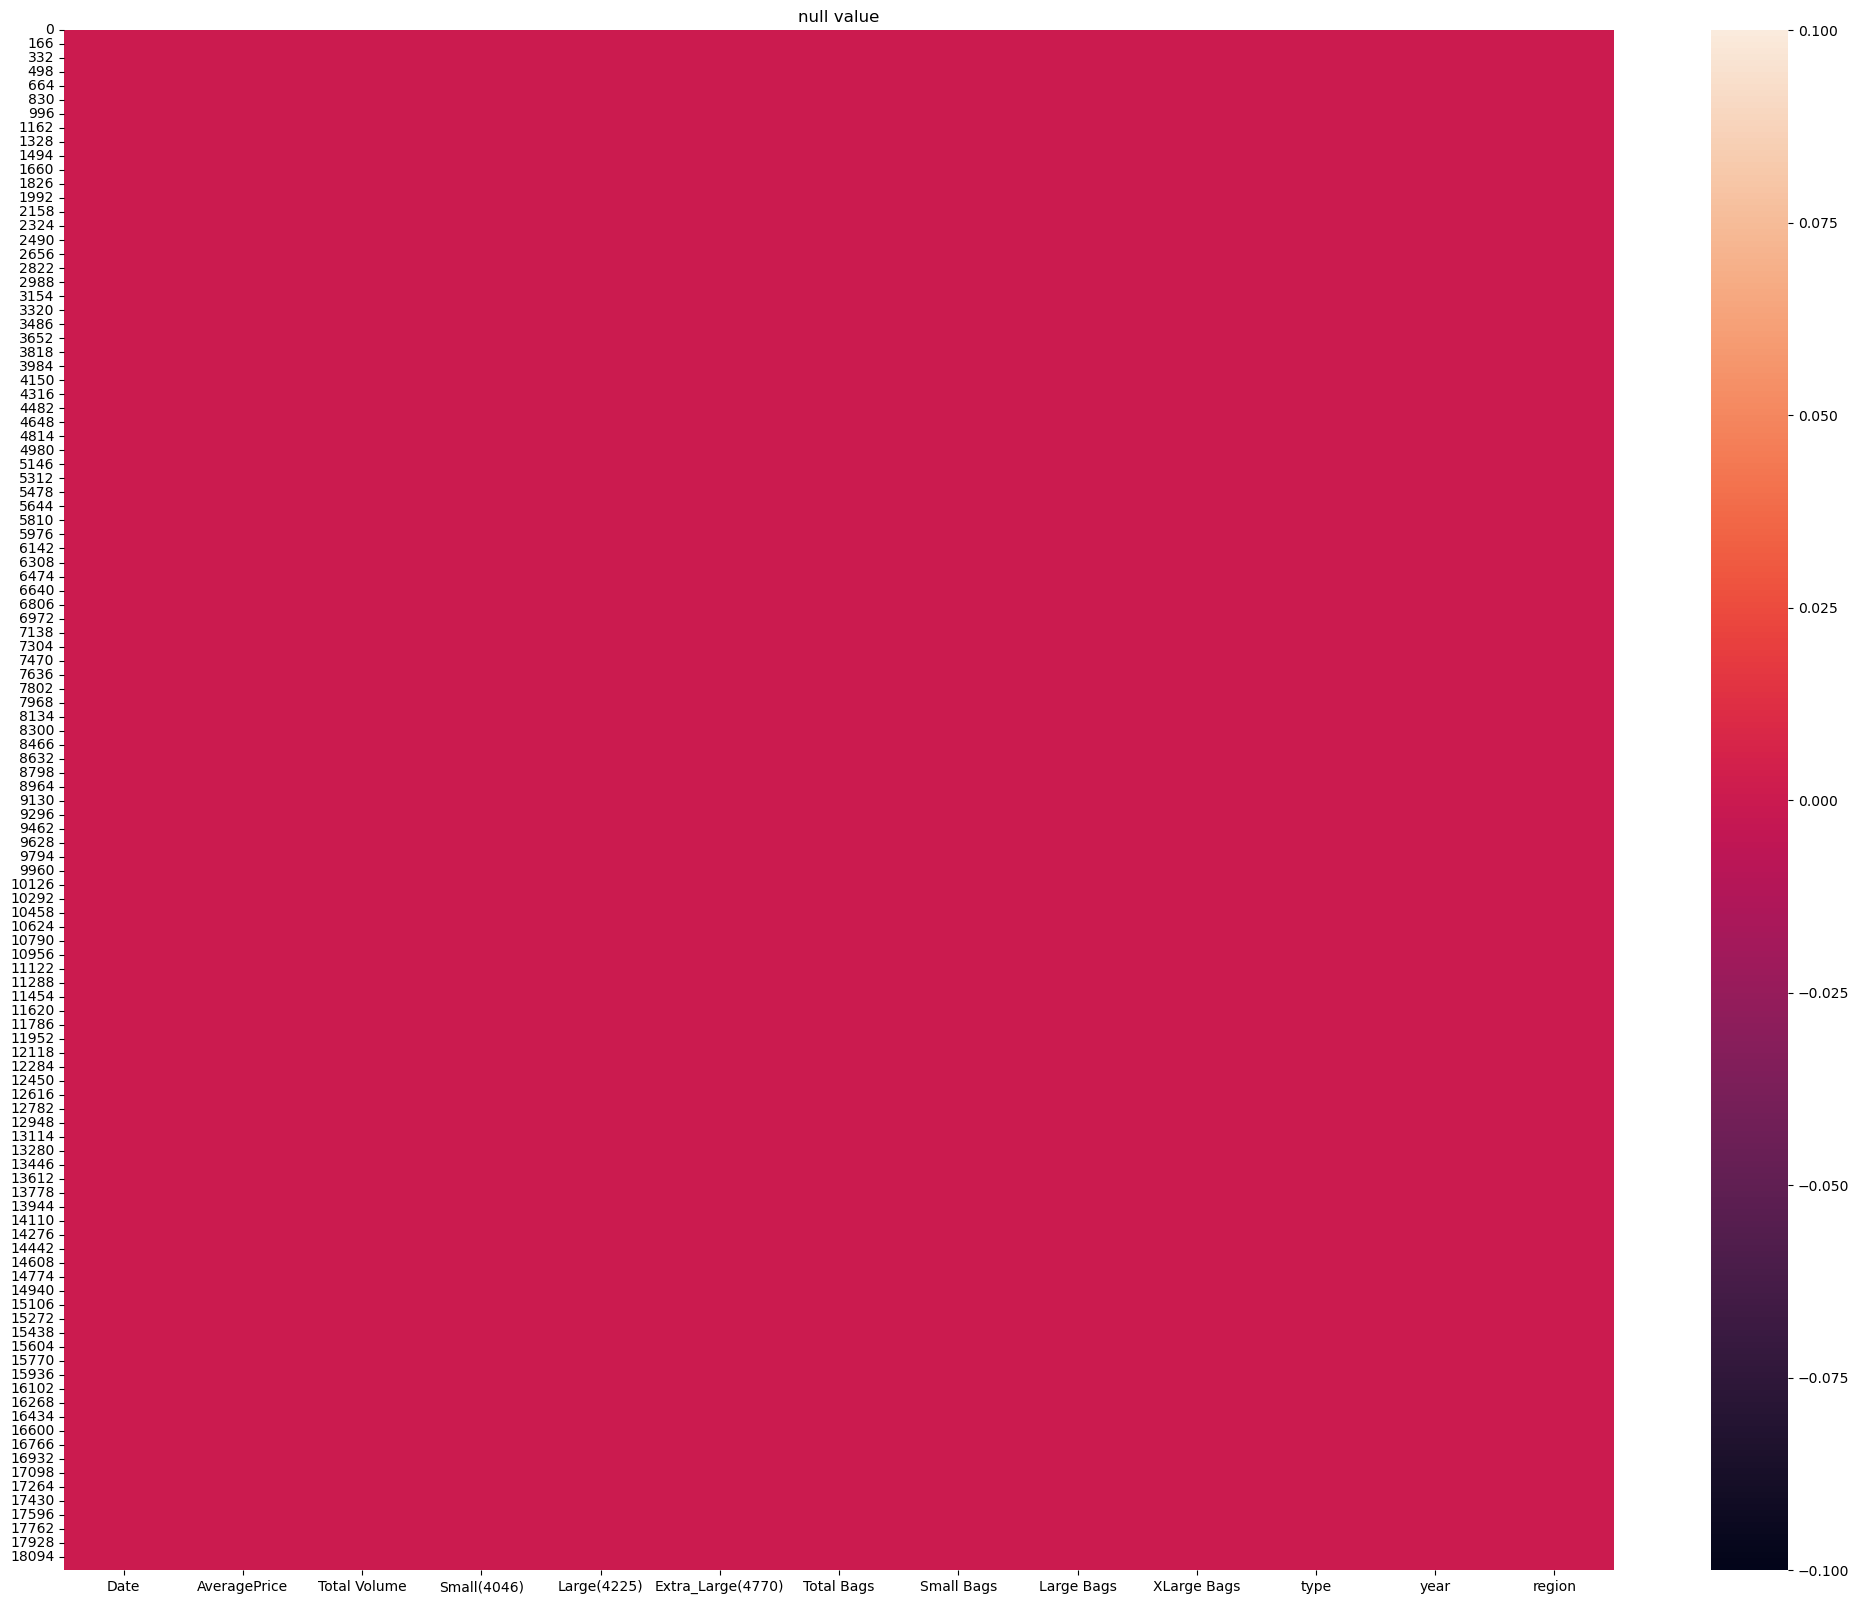

In [10]:
plt.figure(figsize=[25,20])
sns.heatmap(df.isnull())
plt.title('null value')
plt.show()

In [11]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

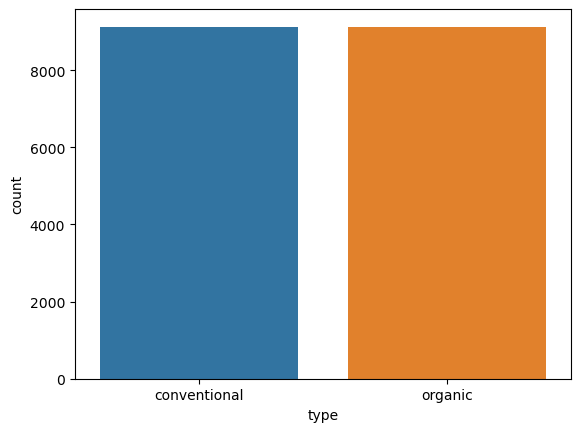

In [13]:

sns.countplot(x="type",data=df)

# Univarient analysis

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

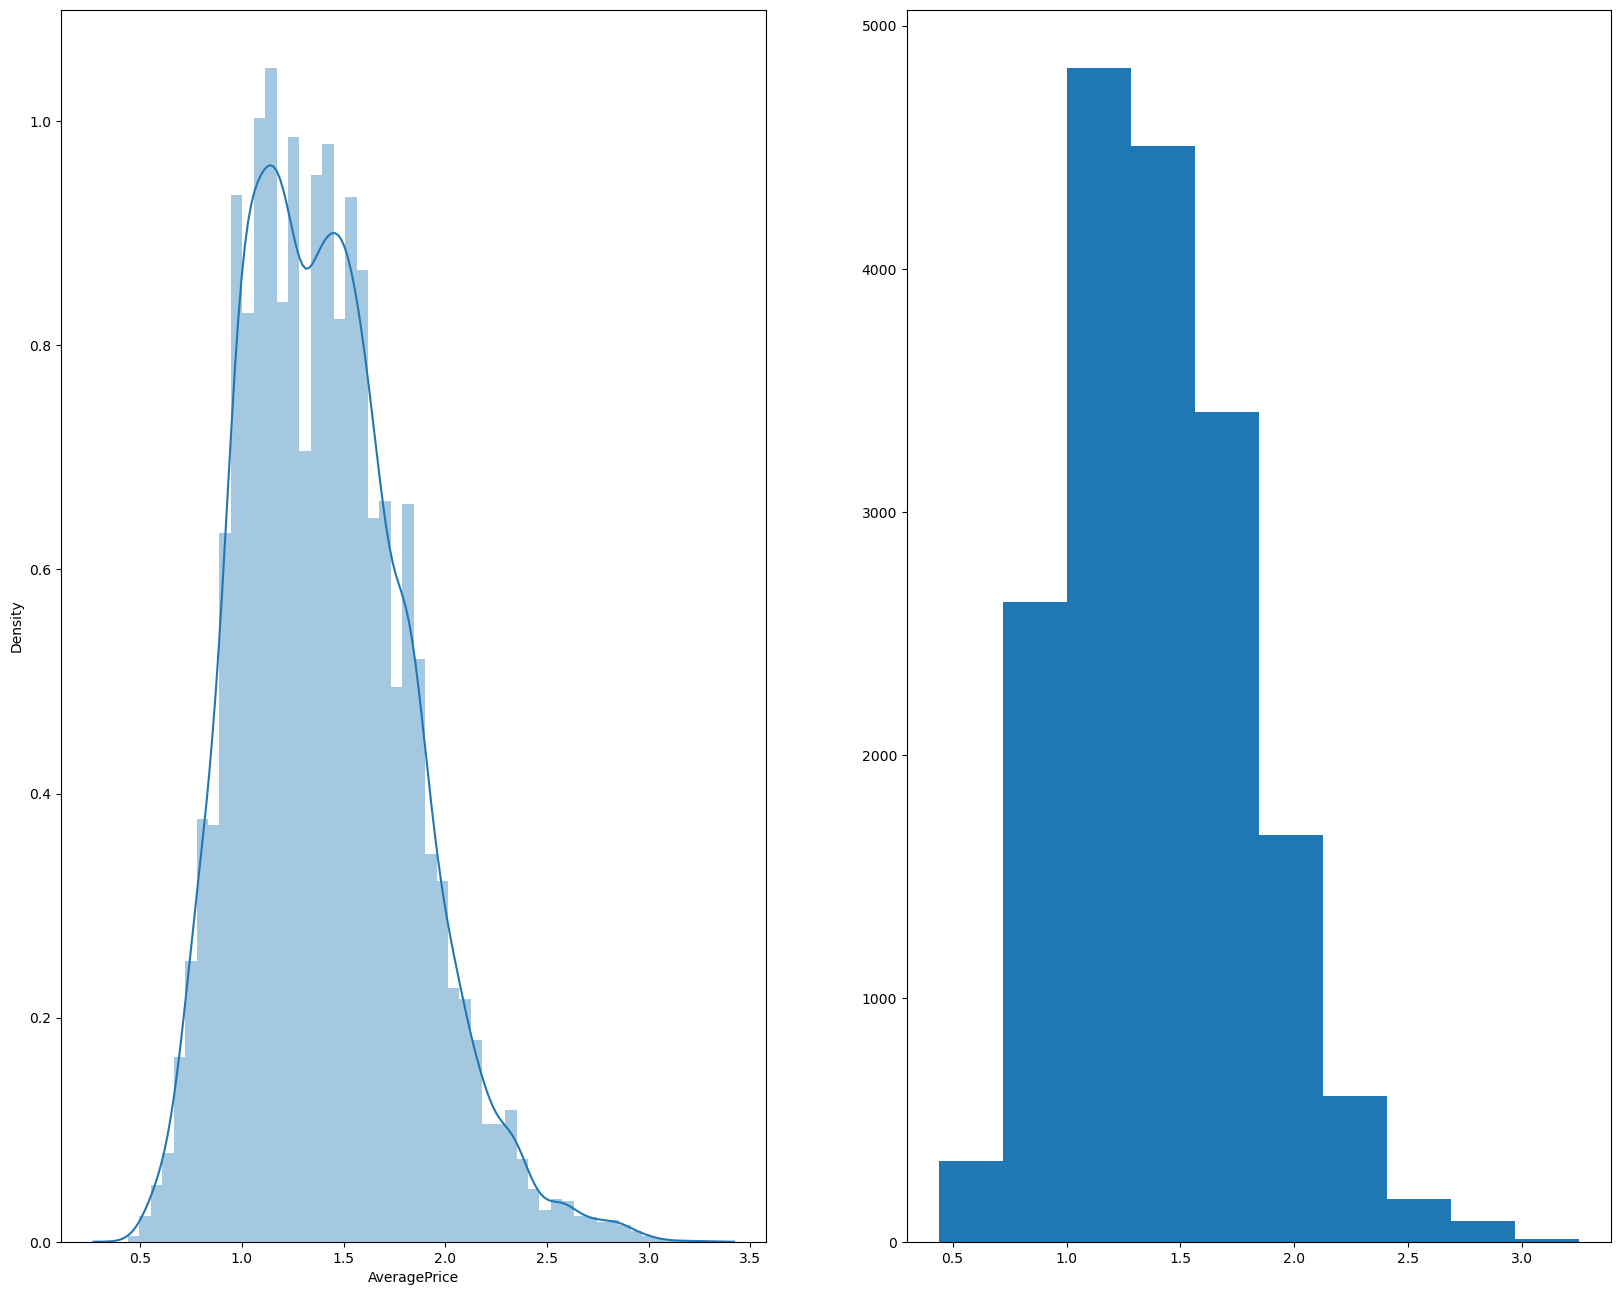

In [15]:
fig=plt.figure(figsize=(20,16))

fig.add_subplot(121)
sns.distplot(df.AveragePrice)

fig.add_subplot(122)
plt.hist(df.AveragePrice)

In [16]:
print('minimum price is:-',df['AveragePrice'].min())
print('maximum price is:-',df['AveragePrice'].max())

minimum price is:- 0.44
maximum price is:- 3.25


In [17]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

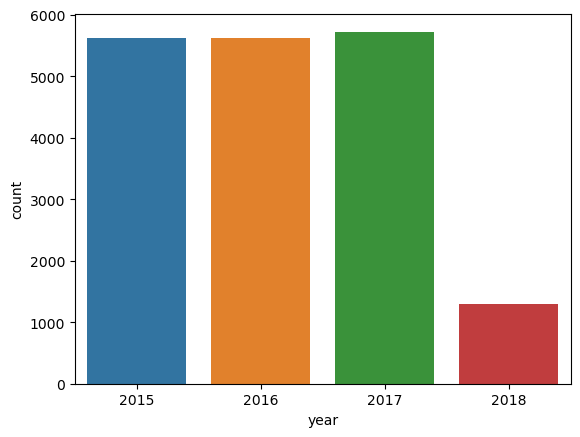

In [19]:

sns.countplot(x='year',data=df)

<Axes: xlabel='AveragePrice', ylabel='Total Volume'>

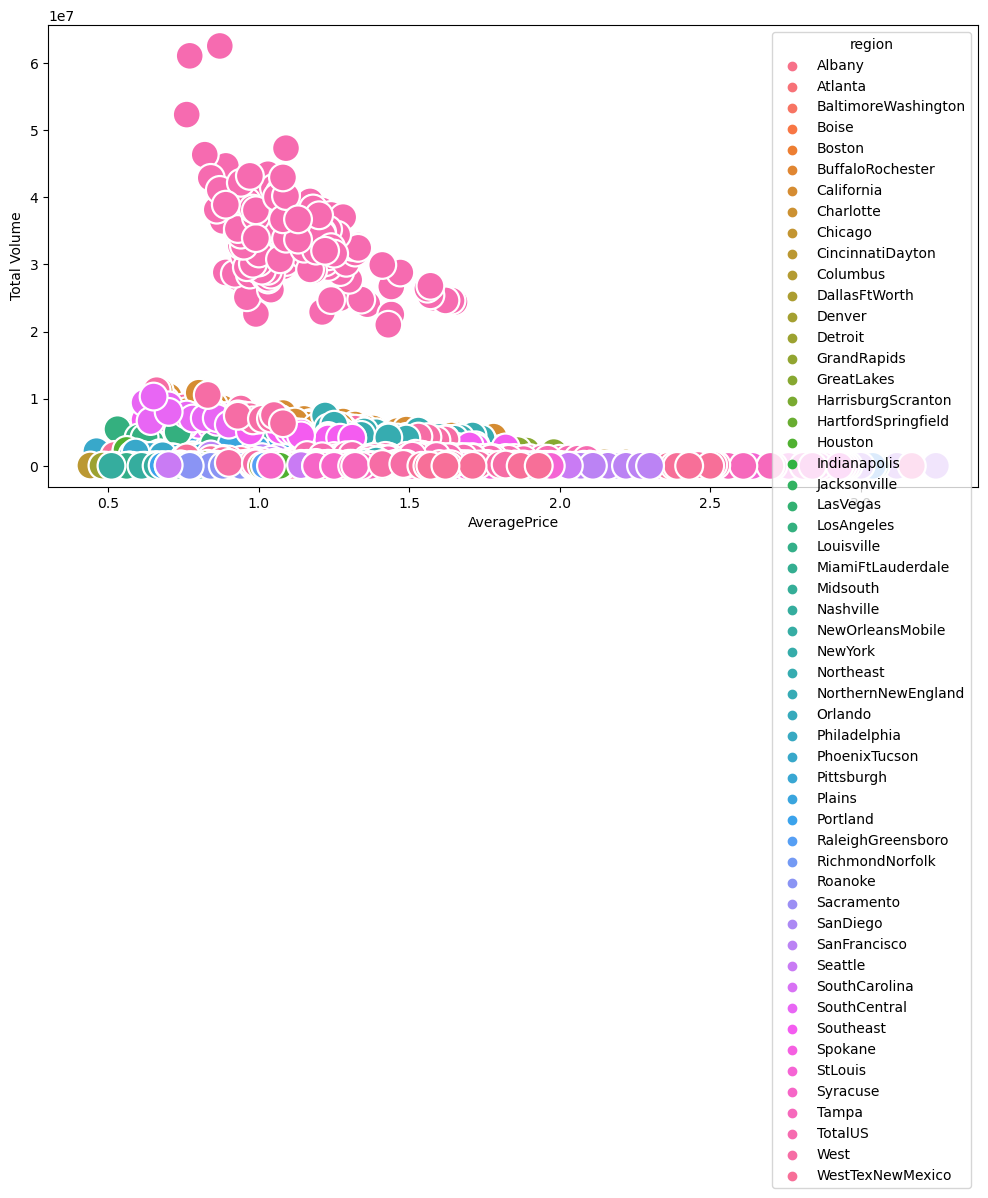

In [21]:
# price to volumne
plt.figure(figsize=(12,6))
sns.scatterplot(x='AveragePrice', y='Total Volume',data=df,hue='region',s=400,marker="o")

<Axes: xlabel='year', ylabel='AveragePrice'>

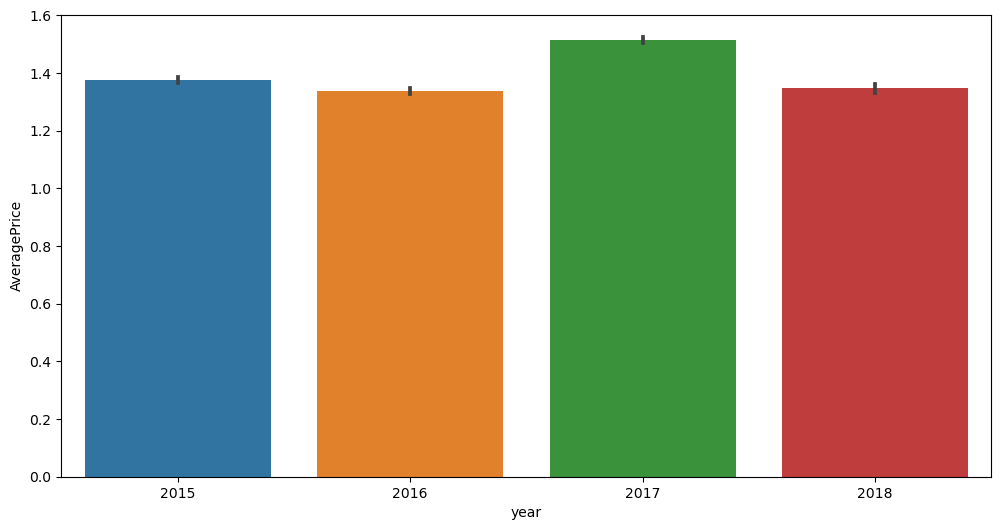

In [22]:
# price to year
plt.figure(figsize=(12,6))
sns.barplot(y='AveragePrice',x='year',data=df)

# Multivarient analysis

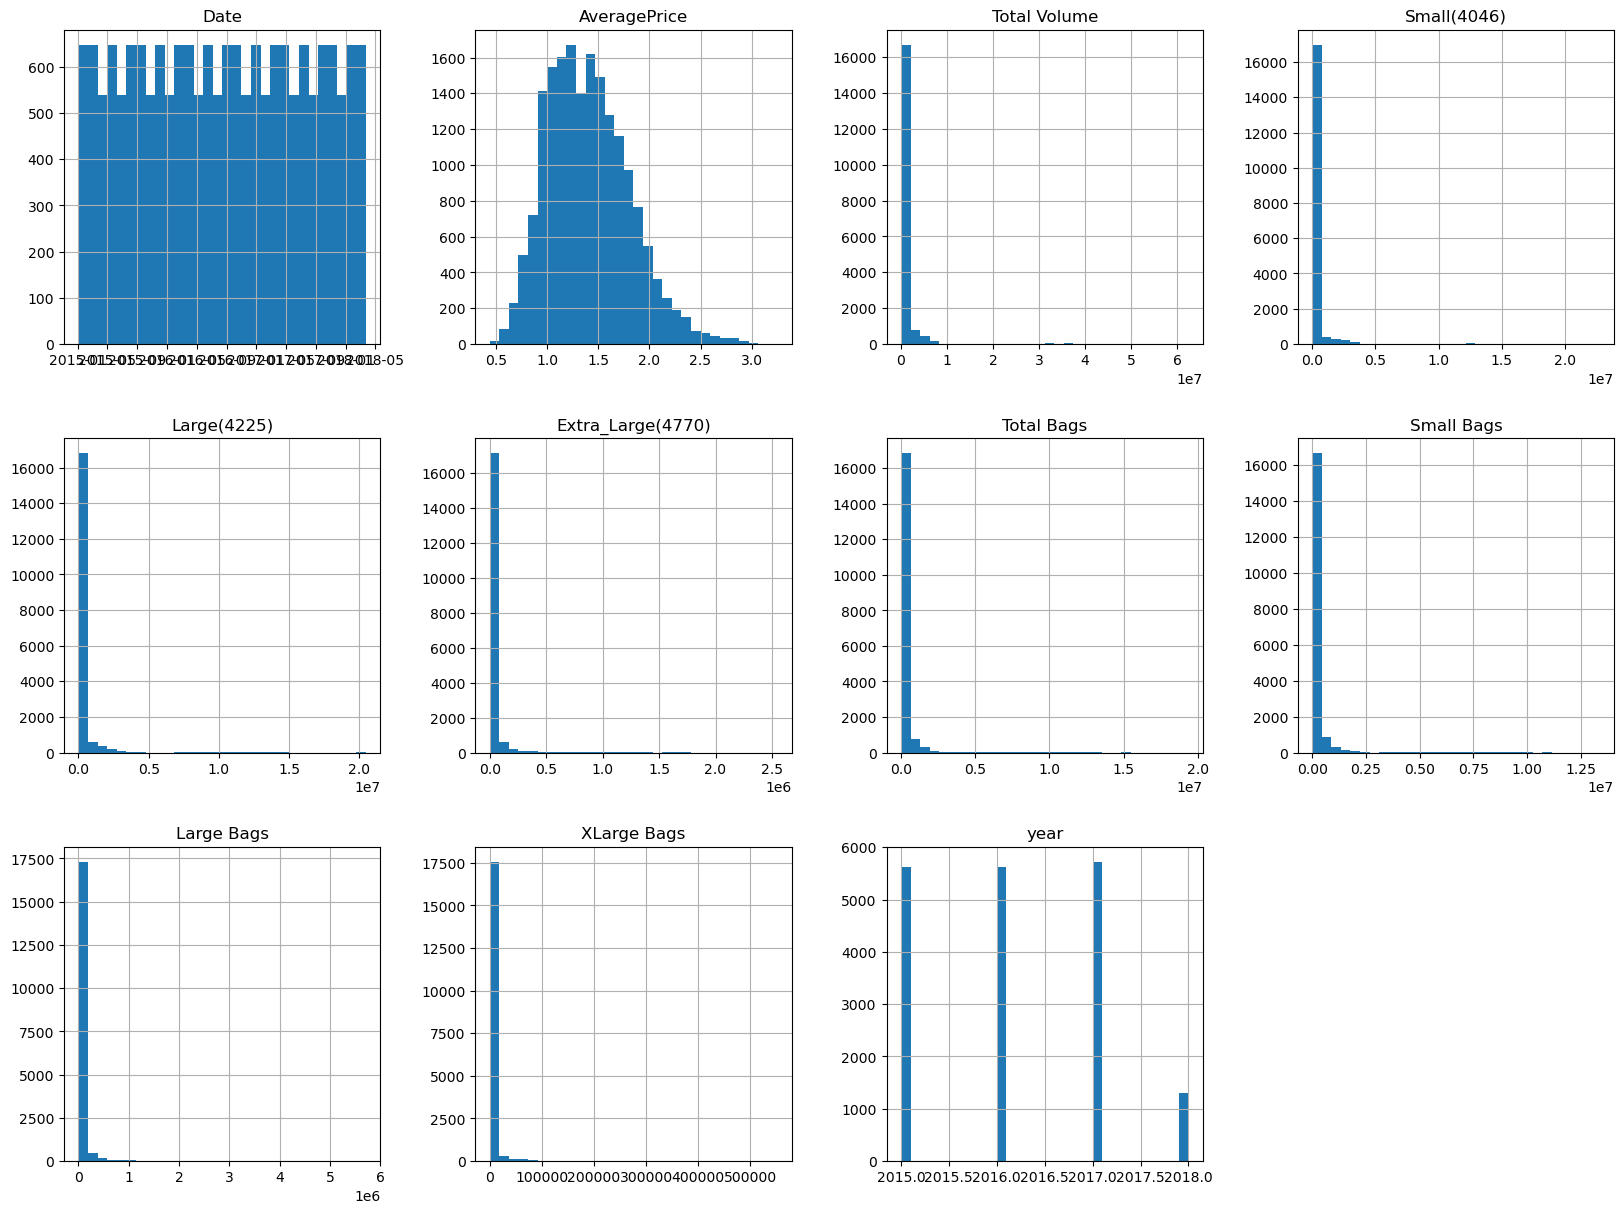

In [23]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
plt.show()

In [24]:
df.corr()

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
Small(4046),-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
Large(4225),-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
Extra_Large(4770),-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<Axes: >

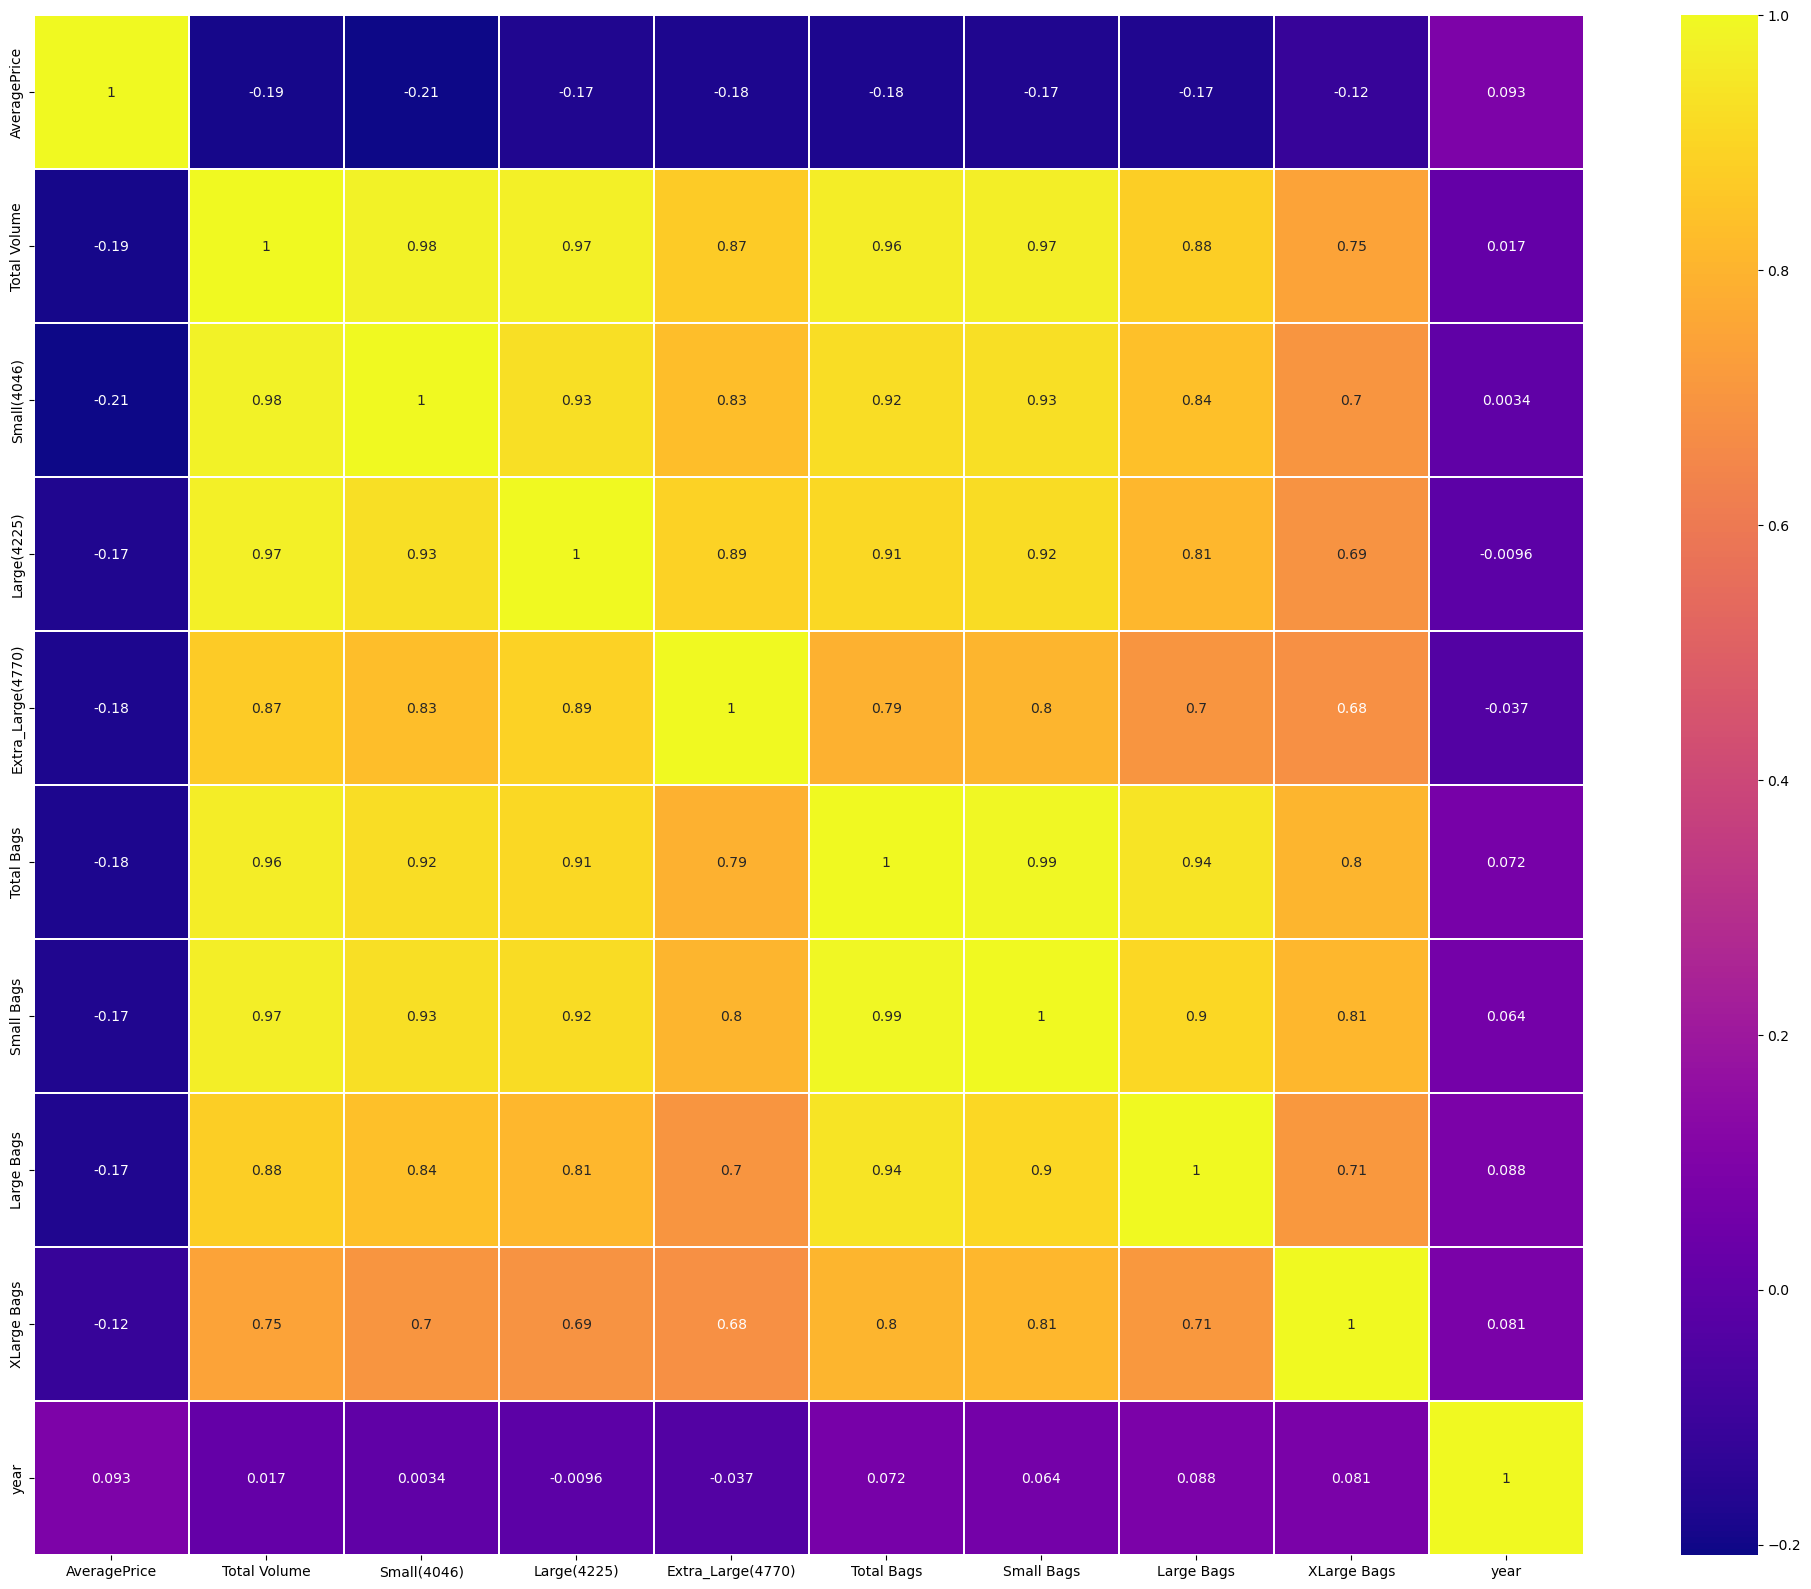

In [25]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cmap='plasma')

In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               18249 non-null  datetime64[ns]
 1   AveragePrice       18249 non-null  float64       
 2   Total Volume       18249 non-null  float64       
 3   Small(4046)        18249 non-null  float64       
 4   Large(4225)        18249 non-null  float64       
 5   Extra_Large(4770)  18249 non-null  float64       
 6   Total Bags         18249 non-null  float64       
 7   Small Bags         18249 non-null  float64       
 8   Large Bags         18249 non-null  float64       
 9   XLarge Bags        18249 non-null  float64       
 10  type               18249 non-null  int32         
 11  year               18249 non-null  int64         
 12  region             18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory u

In [27]:
df.drop(['Date'],axis=1,inplace=True)

In [30]:
# addressing outliers using the IOR:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

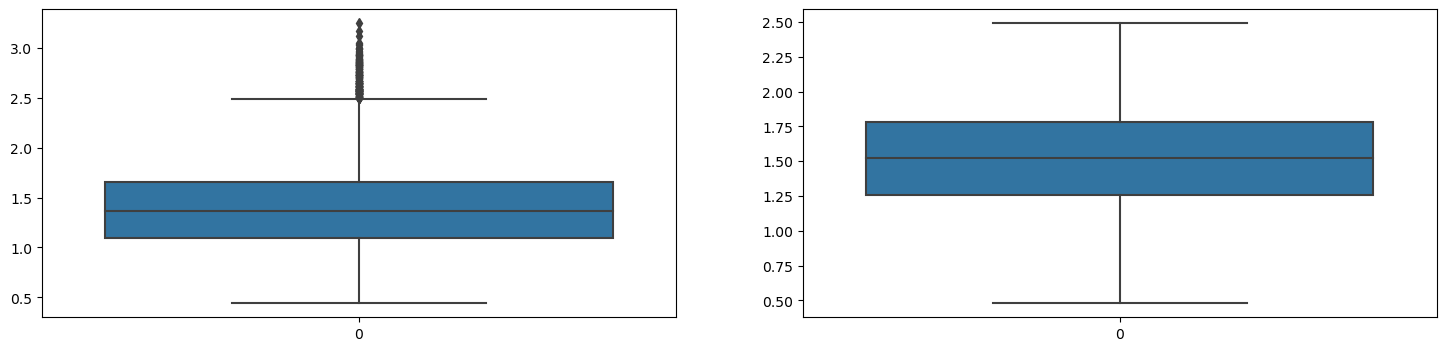

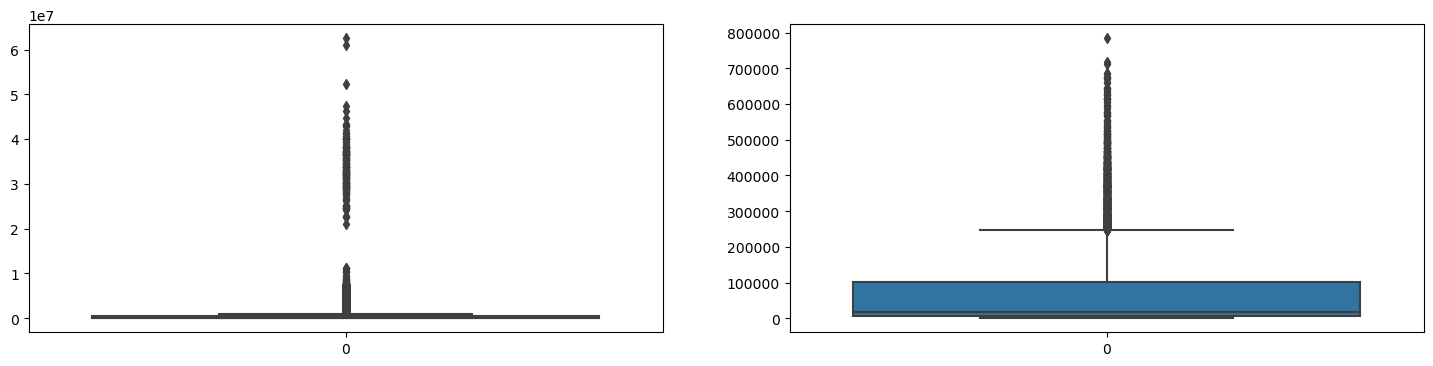

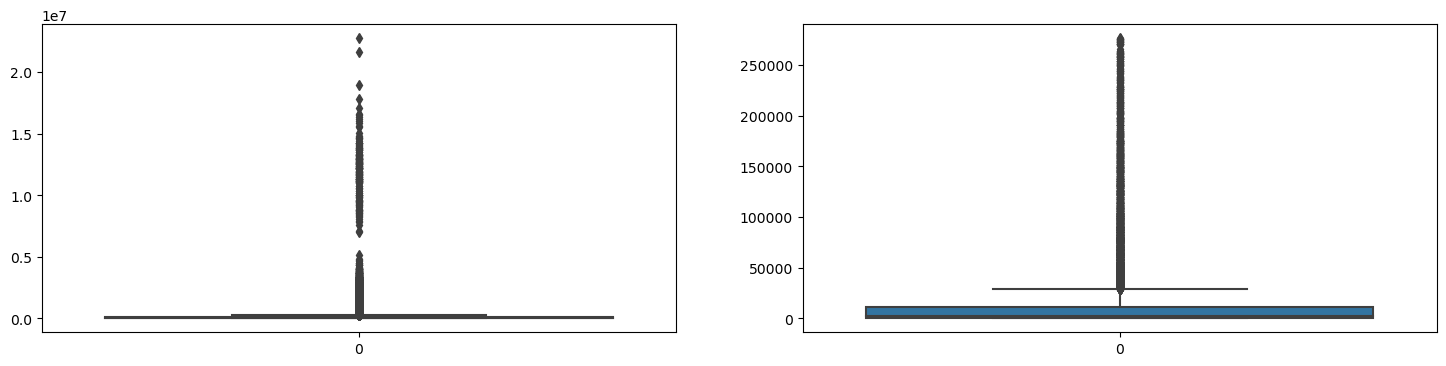

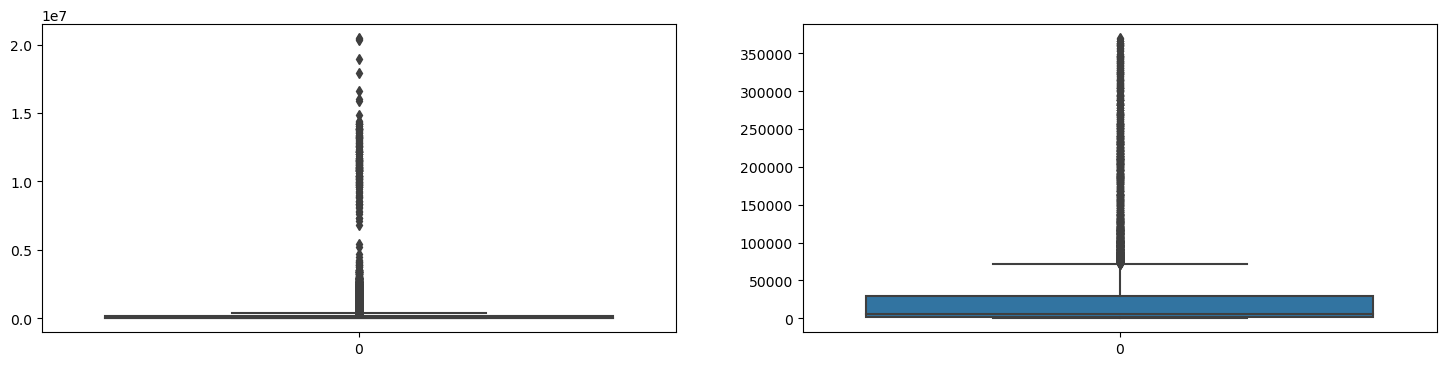

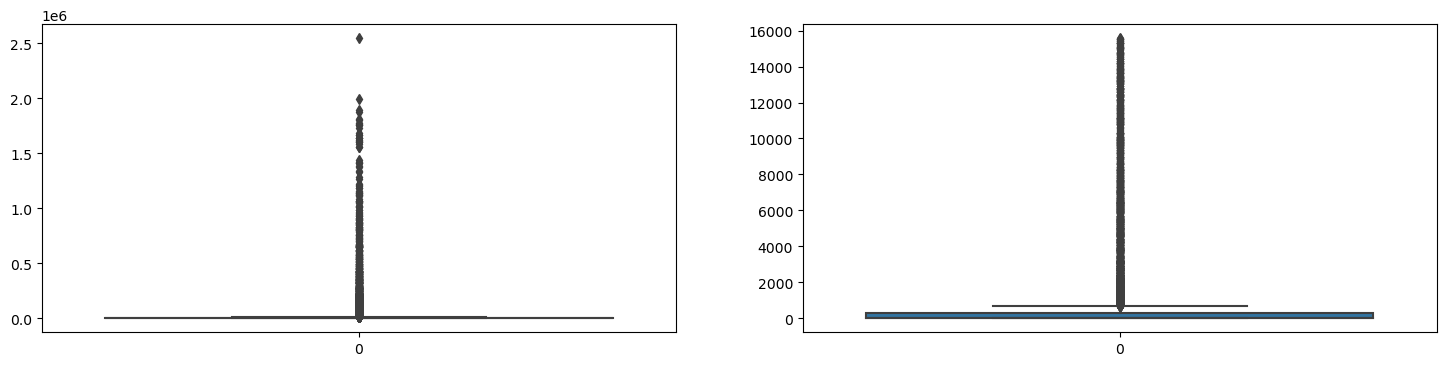

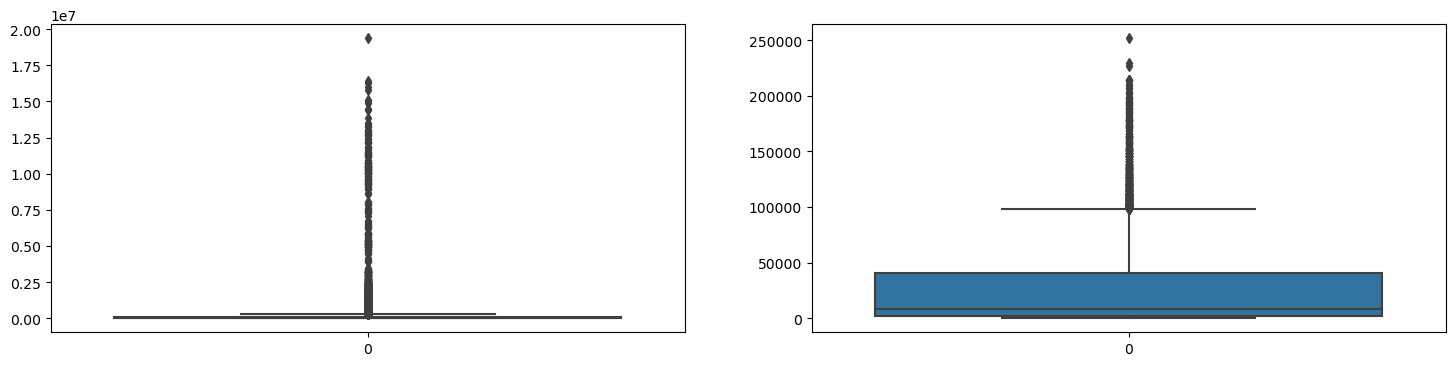

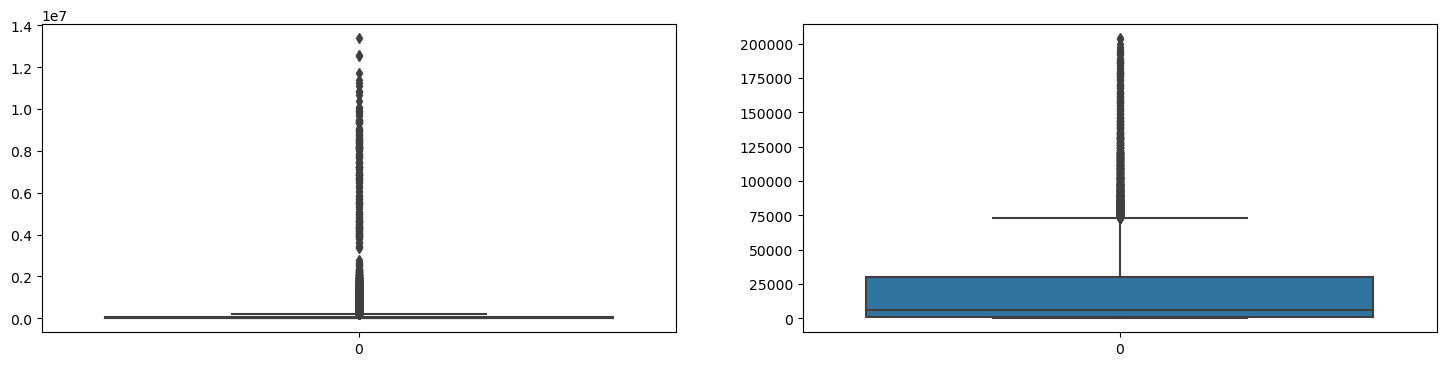

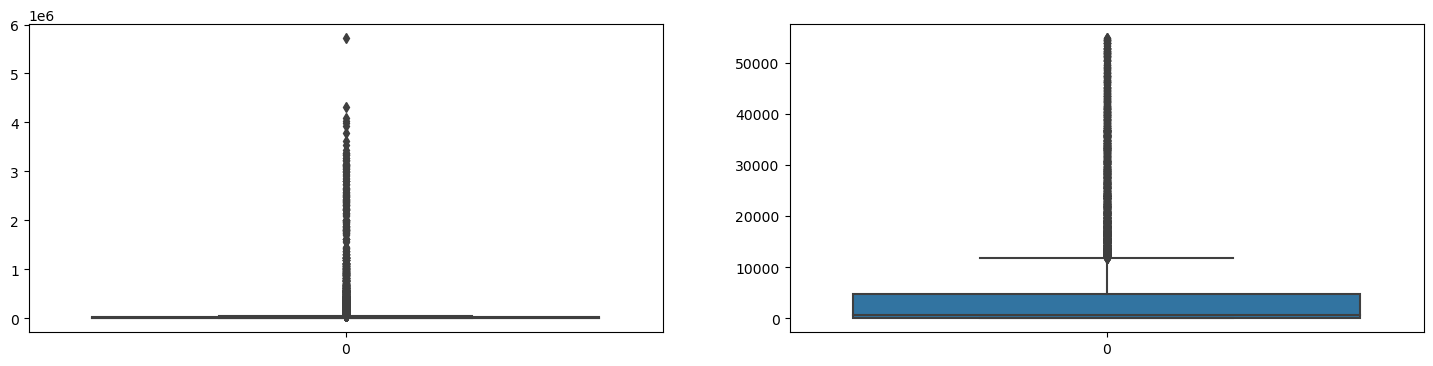

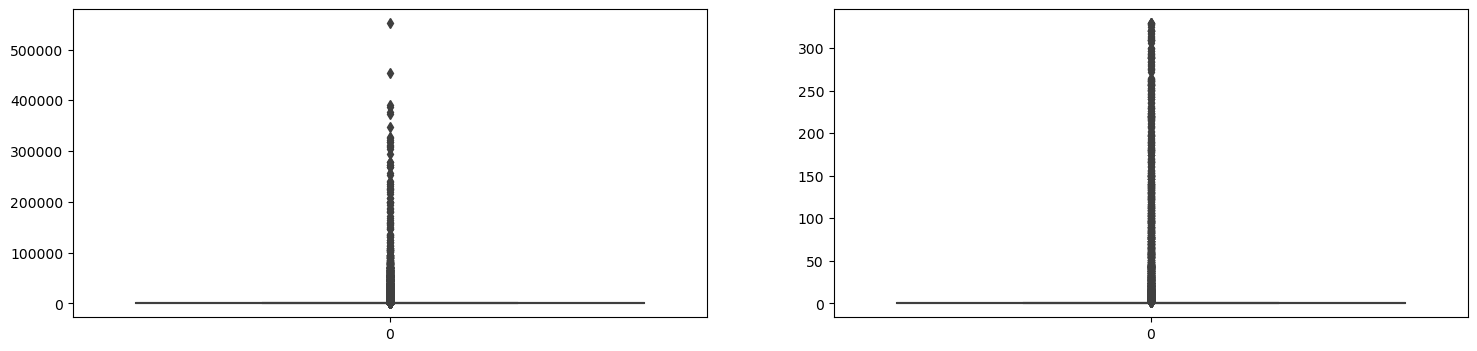

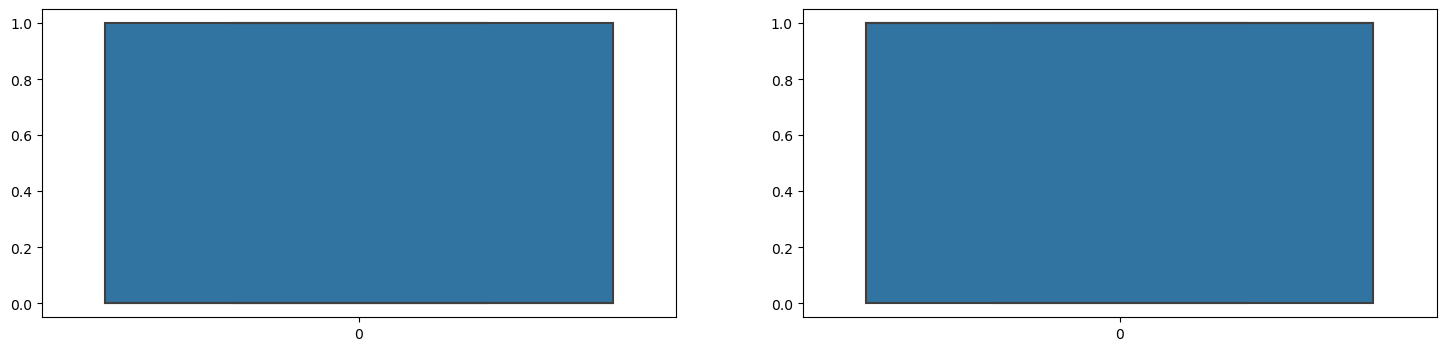

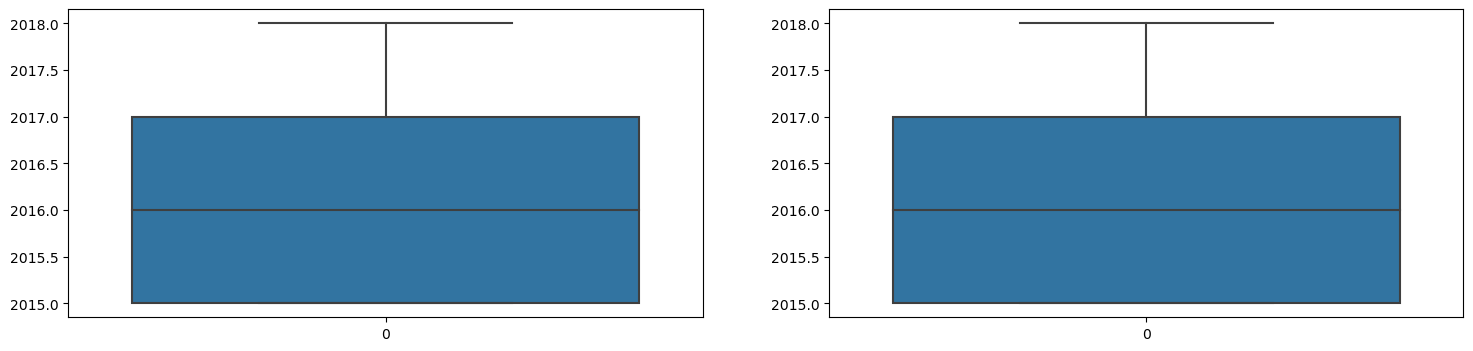

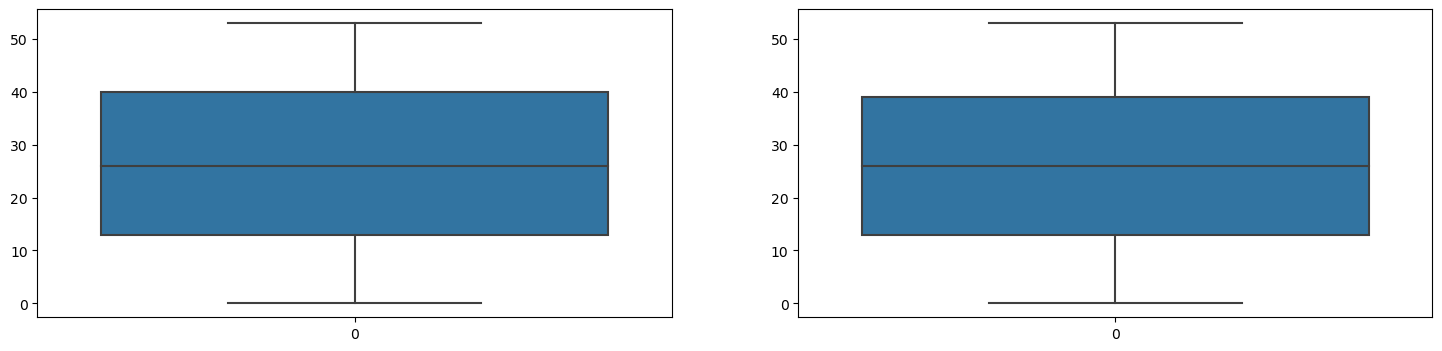

In [31]:
for col in df:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    
    fig.add_subplot(122)
    sns.boxplot(df_clean[col])
    plt.show()

In [32]:
df_clean.skew()

AveragePrice         0.178568
Total Volume         2.089438
Small(4046)          3.221956
Large(4225)          3.311853
Extra_Large(4770)    3.776141
Total Bags           1.894051
Small Bags           2.131918
Large Bags           2.685981
XLarge Bags          6.077403
type                -1.142886
year                 0.297241
region              -0.022111
dtype: float64

In [33]:
df_clean.columns

Index(['AveragePrice', 'Total Volume', 'Small(4046)', 'Large(4225)',
       'Extra_Large(4770)', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [38]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [39]:
x.head()

,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [40]:

y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new=scale.fit_transform(x)
x_new


array([[-0.22771641, -0.23081597, -0.1999022 , ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.23042664, -0.23110251, -0.20805446, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.30,random_state=50)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12774, 11), (12774,), (5475, 11), (5475,))